In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [12]:
data = transactions.merge(customers, on='CustomerID')

# Feature engineering
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  
    'TransactionID': 'count',  
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'PurchaseFrequency',
})

# standardizing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)



In [13]:
# Perform KMeans clustering 
kmeans = KMeans(n_clusters=5, random_state=42)  
clusters = kmeans.fit_predict(scaled_features)
customer_features['Cluster'] = clusters

# Calculate metrics
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")


pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_features['PCA1'] = reduced_features[:, 0]
customer_features['PCA2'] = reduced_features[:, 1]

C:\Users\saisa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saisa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.7684193031785918
Silhouette Score: 0.40258813522360876


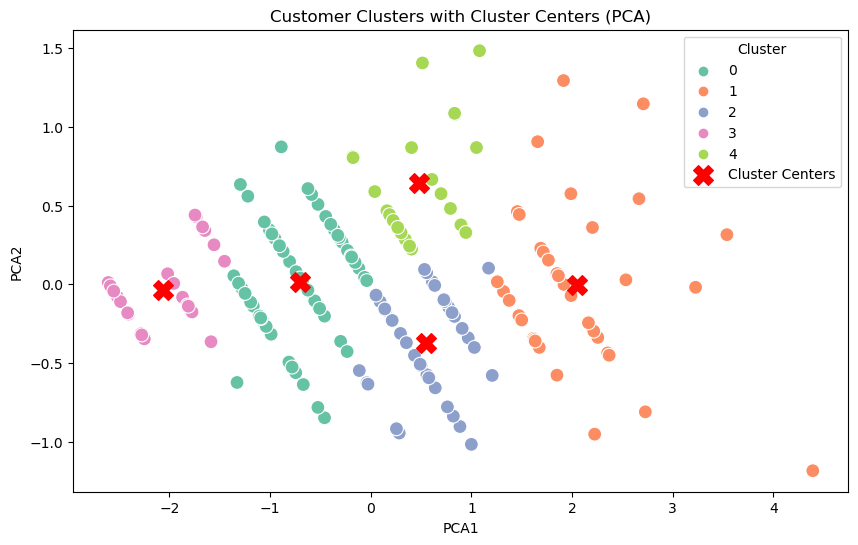

In [14]:
cluster_centers = kmeans.cluster_centers_
reduced_centers = pca.transform(cluster_centers)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='Set2', s=100
)
plt.scatter(
    reduced_centers[:, 0], reduced_centers[:, 1], 
    c='red', s=200, marker='X', label='Cluster Centers'
)
plt.title('Customer Clusters with Cluster Centers (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


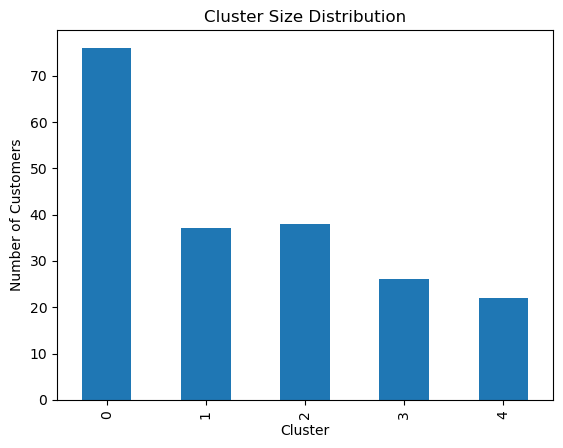

In [15]:
# Cluster size distribution
customer_features['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()
